Load the created datset(*new_features.pickle*)

In [ ]:
# load the Datset 
from google.colab import files
uploaded = files.upload()

Saving new_features.pickle to new_features.pickle


Read the datset 

In [ ]:

import pickle

with open('new_features.pickle', 'rb') as handle:
    wav_features = pickle.load(handle)
wav_features.keys()

dict_keys(['data', 'target1', 'target2', 'data_paths'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X,y = np.array(wav_features["data"]),np.array(wav_features['target2'])

In [ ]:
from time import time

def clustering_fit_stats(estimator, name, X,y):
    
    t0 = time()
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    y_pred = estimator.fit_predict(lda_components)
    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)
    y_pred = estimator.fit_predict(pca_components)'''
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             metrics.adjusted_rand_score(y, y_pred),
             metrics.adjusted_mutual_info_score(y, y_pred),
             metrics.normalized_mutual_info_score(y, y_pred),
             metrics.homogeneity_score(y, y_pred),
             metrics.completeness_score(y, y_pred),
             metrics.v_measure_score(y,y_pred),
             metrics.silhouette_score(X, y_pred, metric='euclidean'),
             metrics.calinski_harabasz_score(X, y_pred),
             metrics.davies_bouldin_score(X, y_pred)))
    
def contingency_matrix(estimator,name,x,y):
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    y_pred = estimator.fit_predict(lda_components)

    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)
    y_pred = estimator.fit_predict(pca_components)'''
    print('\n')
    print(name)
    print(metrics.cluster.contingency_matrix(y, y_pred))

def clustering_data(estimator,name, X,limit=5):
    print('\n')
    print(name+'\n')
    y_pred = estimator.fit_predict(X)
    clusters = np.unique(y_pred)
    clustering_data = []
    for cluster in clusters:
      row_ix = np.where(y_pred == cluster)[0]
      data_num = min(len(row_ix),limit)
      data = X[row_ix[:data_num],:]
      data = np.column_stack((data,[cluster for i in range(len(data))]))
      clustering_data = clustering_data + data.tolist()

    clustering_df = pd.DataFrame(clustering_data,  columns = list(features_df.columns)+['cluster'])
    display(clustering_df)
    
def clustering_plot(estimator,name, X,y):

    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)'''

    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)

    y_pred = estimator.fit_predict(lda_components)

    clusters = np.unique(y_pred)

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(projection='3d')

    for cluster in clusters:
        row_ix = np.where(y_pred == cluster)
        ax.scatter(lda_components[row_ix,0],lda_components[row_ix,1],lda_components[row_ix,2], alpha=0.8, label=cluster)
        #plt.scatter(lda_components[row_ix,0],lda_components[row_ix,1],alpha=0.8,label=cluster)
    ax.view_init(elev=30., azim=-60)
    ax.legend(loc="upper left")   
    plt.title(name)
    plt.show()

def plot_labels(X,y):
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    targets = np.unique(y)
    for target in targets:
        row_ix = np.where(y == target)
        plt.scatter(lda_components[row_ix,0],lda_components[row_ix,1],alpha=0.8,label=target)
    plt.legend(loc="upper right", ncol=len(targets))   
    plt.title("true lablels")
    plt.show()

#KMEANS

*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means2 	0.832s	0.070	0.071	0.071	0.053	0.107	0.071	0.200	6274.792  1.476
K-means4 	1.344s	0.053	0.056	0.057	0.056	0.057	0.057	0.023	2072.235  4.003
K-means10	2.241s	0.036	0.063	0.064	0.084	0.051	0.064	-0.063	1123.933  5.648




K-means2
[[2834 1372]
 [2419 1765]
 [1095 3124]
 [1065 3152]]




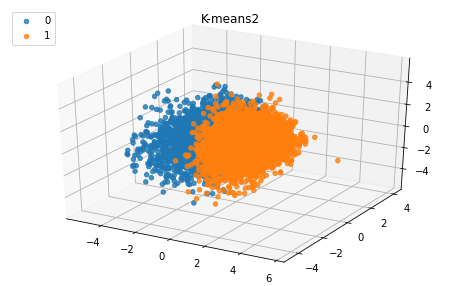



K-means4
[[ 923 1904  720  659]
 [1279  910 1200  795]
 [ 690  929  466 2134]
 [1108  970  307 1832]]




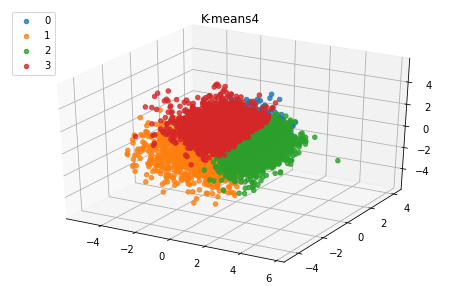



K-means10
[[307 152 377 829 178 675 216 666 578 228]
 [484 363 323 443 486 300 207 684 342 552]
 [184 411 688 182 502 545 984 499 155  69]
 [369 207 968 250 615 483 670 549  58  48]]




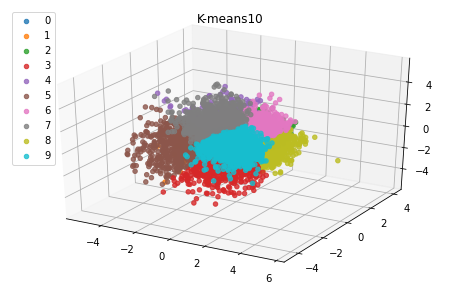

In [ ]:
#----------KMEANS---------------#
#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(11):
  if (i==2 or i==4 or i==10):
    estimator = KMeans(n_clusters= i)
    clustering_fit_stats(estimator,"K-means"+str(i),X,y)
print('\n')


#contingency_matrix and plot
for i in range (11):
  if (i==2 or i==4 or i==10):
    estimator = KMeans(n_clusters= i)
    contingency_matrix(estimator,"K-means"+str(i),X,y)
    print('\n')
    clustering_plot(estimator,"K-means"+str(i), X,y)
print('\n')

#AgglomerativeClustering

*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
Agglomerative2	18.497s	0.026	0.033	0.033	0.024	0.054	0.033	0.073	1641.600  2.629
Agglomerative4	17.669s	0.051	0.049	0.049	0.047	0.052	0.049	-0.010	1583.297  4.224
Agglomerative10	18.378s	0.029	0.055	0.055	0.072	0.045	0.055	-0.084	1007.980  5.466




Agglomerative2
[[2541 1665]
 [2320 1864]
 [3248  971]
 [3552  665]]




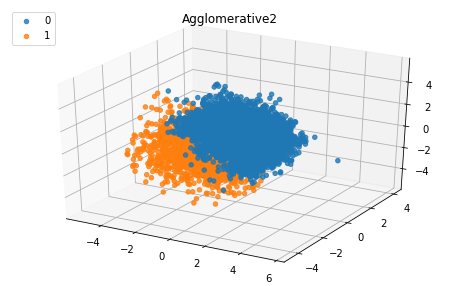



Agglomerative4
[[1665  998 1199  344]
 [1864 1184  610  526]
 [ 971 2356  684  208]
 [ 665 2439  745  368]]




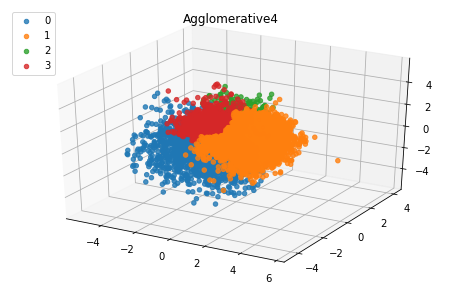



Agglomerative10
[[ 388  292  231  344  602  451  540  159  449  750]
 [ 639  562  393  526  642  448  267   97  242  368]
 [1148  510   39  208  265  610  157  598   98  586]
 [1072  284   32  368  290  915   59  452  150  595]]




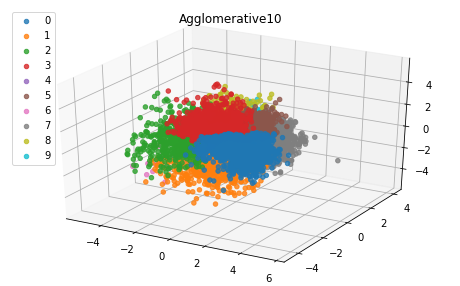

In [ ]:
#----------AgglomerativeClustering---------------#
#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(11):
  if (i==2 or i==4 or i==10):
     estimator = AgglomerativeClustering(n_clusters=i)
     clustering_fit_stats(estimator,"Agglomerative"+str(i),X,y)
print('\n')

#contingency_matrix and plot
for i in range(11):
  if (i==2 or i==4 or i==10):
     estimator = AgglomerativeClustering(n_clusters=i)
     contingency_matrix(estimator,"Agglomerative"+str(i),X,y)
     print('\n')
     clustering_plot(estimator,"Agglomerative"+str(i), X,y)
print('\n')


#GaussianMixture

*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
GaussianMixture2	0.399s	0.031	0.040	0.040	0.029	0.065	0.040	0.131	2800.195  2.054
GaussianMixture4	0.498s	0.052	0.055	0.056	0.055	0.057	0.056	0.025	1979.293  3.966
GaussianMixture10	0.785s	0.034	0.063	0.063	0.082	0.051	0.063	-0.074	1027.948  5.688


*contingency_matrix


GaussianMixture2
[[1634 2572]
 [1981 2203]
 [ 849 3370]
 [ 682 3535]]




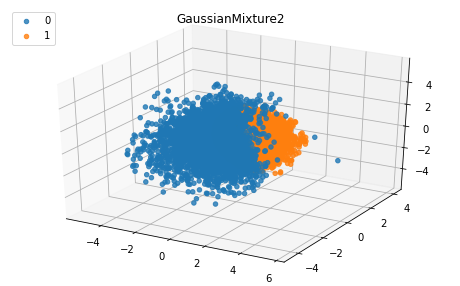



GaussianMixture4
[[ 683  790  671 2062]
 [1021  919 1142 1102]
 [ 498 2256  456 1009]
 [ 846 2094  235 1042]]




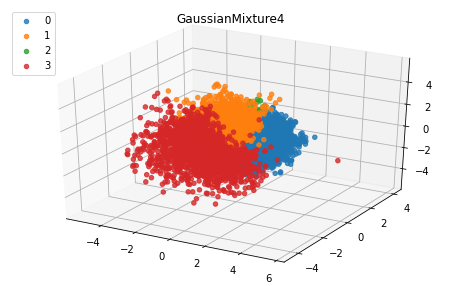



GaussianMixture10
[[ 702  133  749  684  212  432  614  295  170  215]
 [ 708  338  427  306  546  384  335  470  462  208]
 [ 523  389  182  525   48  767  151  182  552  900]
 [ 552  173  247  475   42 1044   66  385  602  631]]




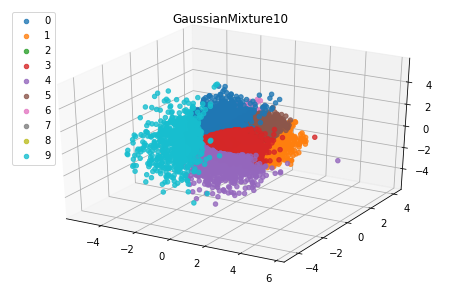

In [ ]:
#----------GaussianMixture---------------#

#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(11):
  if (i==2 or i==4 or i==10):
    estimator = GaussianMixture(n_components= i)
    clustering_fit_stats(estimator,"GaussianMixture"+str(i),X,y)
print('\n')

print('*contingency_matrix')
#contingency_matrix
for i in range(11):
  if (i==2 or i==4 or i==10):
    estimator = GaussianMixture(n_components= i)
    contingency_matrix(estimator,"GaussianMixture"+str(i),X,y)
    print('\n')
    clustering_plot(estimator,"GaussianMixture"+str(i), X,y)
print('\n')